# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation #updated code to run past errors

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43136.72
The current value of your 5.3 ETH is $12442.26


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [8]:
# Format current date as ISO format
today = pd.Timestamp('2023-06-16', tz='America/New_York').isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(
    tickers,
    timeframe,
    start = today
).df


# Reorganize the DataFrame
# Separate ticker data
AGG = df_investments[df_investments["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_investments[df_investments["symbol"]=="SPY"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])

# Preview DataFrame
df_portfolio.head()

AGG                                              \
                            open    high     low  close   volume trade_count   
timestamp                                                                      
2023-06-16 04:00:00+00:00  98.09  98.275  97.905  98.14  4599777       26718   

                                         SPY                            \
                                vwap    open      high     low   close   
timestamp                                                                
2023-06-16 04:00:00+00:00  98.118495  443.02  443.6078  438.97  439.46   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2023-06-16 04:00:00+00:00  110461387      619074  440.999282

In [9]:
# Pick AGG and SPY close prices

agg_close_price = df_portfolio["AGG"]["close"][-1]
spy_close_price = df_portfolio["SPY"]["close"][-1]

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $98.14
Current SPY closing price: $439.46


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21973.00
The current value of your 200 AGG shares is $19628.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 14000

# Consolidate financial assets data
savings = {'Amount' : [my_spy_value,my_agg_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(savings, index =['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,Amount
crypto,21973.0
shares,19628.0


array([<Axes: ylabel='Amount'>], dtype=object)

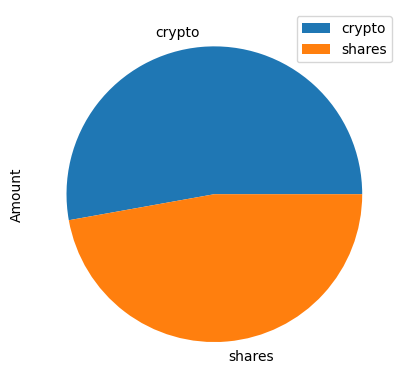

In [12]:
# Plot savings pie chart
df_savings.plot(kind="pie", subplots=True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())
difference = emergency_fund - total_savings

# Validate saving health

if total_savings > emergency_fund:
    print("Congratulations! you reach financial goal")
elif total_savings > emergency_fund:
    print("Congratulations! you have enough money in the fund")

else:
    print(f"You need {difference} to reach your financial goal")

You need 399.0 to reach your financial goal


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-16', tz='America/New_York').isoformat()

In [24]:
# Get 5 years' worth of historical data for SPY and AGG
df_financial_ticker = alpaca.get_bars(tickers, timeframe, start=start_date, end=end_date,limit=1000).df.dropna()
# Reorganize the DataFrame
# Separate ticker data
AGG = df_financial_ticker[df_financial_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_financial_ticker[df_financial_ticker['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_financial_ticker = pd.concat([AGG,SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
df_financial_ticker.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2021-05-03 04:00:00+00:00  114.40  114.59  114.3300  114.39  5936657   
2021-05-04 04:00:00+00:00  114.55  114.70  114.4100  114.53  6205516   
2021-05-05 04:00:00+00:00  114.45  114.62  114.4222  114.62  4475129   
2021-05-06 04:00:00+00:00  114.55  114.71  114.5300  114.64  4572038   
2021-05-07 04:00:00+00:00  114.85  114.97  114.5700  114.61  7003905   

                                                      SPY                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2021-05-03 04:00:00+00:00       23470  114.434938  419.43  419.840  417.665   
2021-05-04 04:00:00+00:00       19679  114.553615  416.07  416.600  411.670   
2021-05-05 04:00:00+00:00       14703  114.545336  417.38  417.630  414.940   
2021-05-06 04:00:00+00:00       16297  114.647698  415.83  419.210  413.675   
2021-05-07 04:00:00+00:00       23953  114.699885  419.89  422.815  419.160   

                                                                        
                            close       volume trade_count        vwap  
timestamp                                                               
2021-05-03 04:00:00+00:00  418.20   67670957.0    380266.0  418.287830  
2021-05-04 04:00:00+00:00  415.62  100024724.0    630354.0  414.468857  
2021-05-05 04:00:00+00:00  415.75   59551464.0    392496.0  416.251905  
2021-05-06 04:00:00+00:00  419.07   72531325.0    496748.0  416.635970  
2021-05-07 04:00:00+00:00  422.12   67458109.0    430564.0  421.616436

In [25]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim = MCSimulation(
    portfolio_data = df_financial_ticker,
    weights = [.8,.2],
    num_simulation = 200,
    num_trading_days = 252*30
)

In [26]:
# Printing the simulation input data
MC_sim.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2021-05-03 04:00:00+00:00  114.40  114.59  114.3300  114.39  5936657   
2021-05-04 04:00:00+00:00  114.55  114.70  114.4100  114.53  6205516   
2021-05-05 04:00:00+00:00  114.45  114.62  114.4222  114.62  4475129   
2021-05-06 04:00:00+00:00  114.55  114.71  114.5300  114.64  4572038   
2021-05-07 04:00:00+00:00  114.85  114.97  114.5700  114.61  7003905   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2021-05-03 04:00:00+00:00       23470  114.434938          NaN  419.43   
2021-05-04 04:00:00+00:00       19679  114.553615     0.001224  416.07   
2021-05-05 04:00:00+00:00       14703  114.545336     0.000786  417.38   
2021-05-06 04:00:00+00:00       16297  114.647698     0.000174  415.83   
2021-05-07 04:00:00+00:00       23953  114.699885    -0.000262  419.89   

                                                                              \
                              high      low   close       volume trade_count   
timestamp                                                                      
2021-05-03 04:00:00+00:00  419.840  417.665  418.20   67670957.0    380266.0   
2021-05-04 04:00:00+00:00  416.600  411.670  415.62  100024724.0    630354.0   
2021-05-05 04:00:00+00:00  417.630  414.940  415.75   59551464.0    392496.0   
2021-05-06 04:00:00+00:00  419.210  413.675  419.07   72531325.0    496748.0   
2021-05-07 04:00:00+00:00  422.815  419.160  422.12   67458109.0    430564.0   

                                                    
                                 vwap daily_return  
timestamp                                           
2021-05-03 04:00:00+00:00  418.287830          NaN  
2021-05-04 04:00:00+00:00  414.468857    -0.006169  
2021-05-05 04:00:00+00:00  416.251905     0.000313  
2021-05-06 04:00:00+00:00  416.635970     0.007986  
2021-05-07 04:00:00+00:00  421.616436     0.007278

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7557,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7558,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7559,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


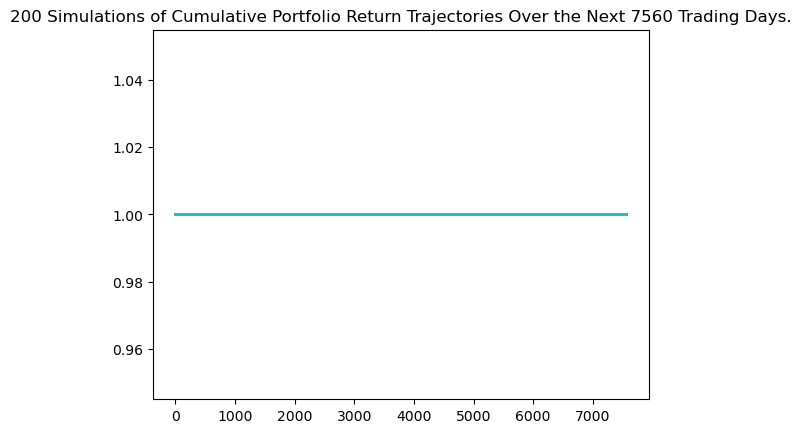

In [19]:
# Plot simulation outcomes
line_plot = MC_sim.plot_simulation()

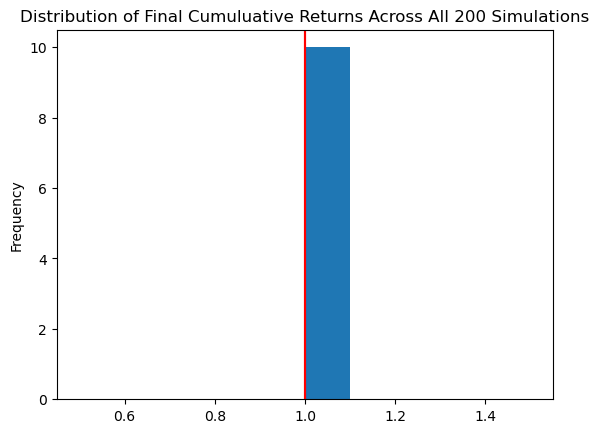

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_sim.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'ci_lower' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")